<a href="https://colab.research.google.com/github/HenrryCordovillo/IOT/blob/main/Clasificaci%C3%B3n_con_%C3%A1rbol_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn 
from sklearn import tree
from IPython.display import Image
import numpy as np

In [2]:
df=pd.read_csv("titanic.csv")

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
titanic_train,titanic_test=train_test_split(df,test_size=0.3,random_state=20)

In [44]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [45]:
titanic_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S


In [46]:
titanic_train["Sex"] = titanic_train["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,774,0,3,"Elias, Mr. Dibo",0,NaN,0,0,2674,7.2250,NaN,C
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0000,C23 C25 C27,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",1,19.0,0,2,11752,26.2833,D47,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",0,25.0,0,0,374887,7.2500,NaN,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.0,1,0,PC 17485,56.9292,A20,C
...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,1,1,"Bazzani, Miss. Albina",1,32.0,0,0,11813,76.2917,D15,C
223,224,0,3,"Nenkoff, Mr. Christo",0,NaN,0,0,349234,7.8958,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0000,NaN,S
474,475,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [48]:
edades_nulas = titanic_train[titanic_train.Age.isnull()]
edades_nulas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,774,0,3,"Elias, Mr. Dibo",0,NaN,0,0,2674,7.2250,NaN,C
454,455,0,3,"Peduzzi, Mr. Joseph",0,NaN,0,0,A/5 2817,8.0500,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",1,NaN,3,1,4133,25.4667,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",1,NaN,0,0,9234,7.7500,NaN,Q
260,261,0,3,"Smith, Mr. Thomas",0,NaN,0,0,384461,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",1,NaN,0,0,330919,7.8292,NaN,Q
485,486,0,3,"Lefebre, Miss. Jeannie",1,NaN,3,1,4133,25.4667,NaN,S
552,553,0,3,"O'Brien, Mr. Timothy",0,NaN,0,0,330979,7.8292,NaN,Q
790,791,0,3,"Keane, Mr. Andrew ""Andy""",0,NaN,0,0,12460,7.7500,NaN,Q


In [51]:
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [52]:
edades_nulas = titanic_train[titanic_train.Age.isnull()]
edades_nulas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [53]:
edades_remplazadas = titanic_train[titanic_train['Name'] == 'Elias, Mr. Dibo']
edades_remplazadas.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,774,0,3,"Elias, Mr. Dibo",0,30.524032,0,0,2674,7.225,NaN,C


In [62]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
773,774,0,3,"Elias, Mr. Dibo",0,30.524032,0,0,2674,7.2250,NaN,C
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23.000000,3,2,19950,263.0000,C23 C25 C27,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",1,19.000000,0,2,11752,26.2833,D47,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",0,25.000000,0,0,374887,7.2500,NaN,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.000000,1,0,PC 17485,56.9292,A20,C
...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,1,1,"Bazzani, Miss. Albina",1,32.000000,0,0,11813,76.2917,D15,C
223,224,0,3,"Nenkoff, Mr. Christo",0,30.524032,0,0,349234,7.8958,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",0,25.000000,0,0,LINE,0.0000,NaN,S
474,475,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


In [65]:
y_target = titanic_train["Survived"].values
y_target

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [68]:
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = titanic_train[list(columns)].values
X_input

array([[  7.225     ,   3.        ,   0.        ,  30.52403226,
          0.        ],
       [263.        ,   1.        ,   1.        ,  23.        ,
          3.        ],
       [ 26.2833    ,   1.        ,   1.        ,  19.        ,
          0.        ],
       ...,
       [  0.        ,   3.        ,   0.        ,  25.        ,
          0.        ],
       [  9.8375    ,   3.        ,   1.        ,  22.        ,
          0.        ],
       [  9.5       ,   3.        ,   0.        ,  28.        ,
          0.        ]])

In [70]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_input, y_target)

In [71]:
clf_train.score(X_input,y_target)

0.8250401284109149

In [74]:
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

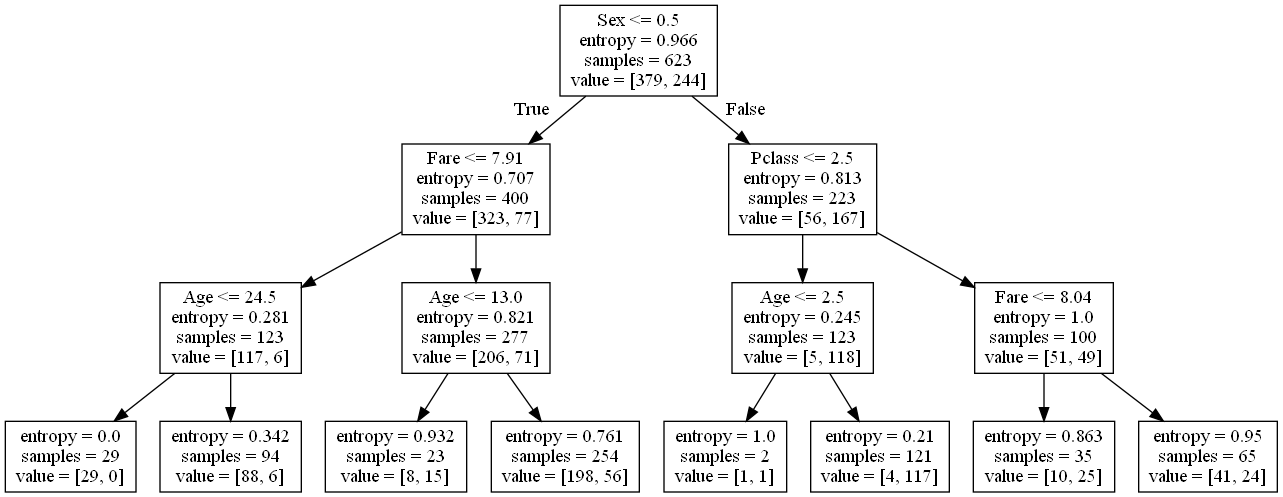

In [76]:
Image("tinatic_dot.png")

In [77]:
titanic_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S


In [78]:
titanic_test["Sex"] = titanic_test["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
titanic_test["Age"].fillna(titanic_test["Age"].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [80]:
titanic_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",1,27.822248,1,0,386525,16.1000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",0,27.822248,0,0,239856,0.0000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",0,16.000000,0,0,239865,26.0000,NaN,S
836,837,0,3,"Pasic, Mr. Jakob",0,21.000000,0,0,315097,8.6625,NaN,S
56,57,1,2,"Rugg, Miss. Emily",1,21.000000,0,0,C.A. 31026,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,0,3,"Green, Mr. George Henry",0,51.000000,0,0,21440,8.0500,NaN,S
543,544,1,2,"Beane, Mr. Edward",0,32.000000,1,0,2908,26.0000,NaN,S
613,614,0,3,"Horgan, Mr. John",0,27.822248,0,0,370377,7.7500,NaN,Q
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",1,9.000000,4,2,347082,31.2750,NaN,S


In [81]:
columns

['Fare', 'Pclass', 'Sex', 'Age', 'SibSp']

In [82]:
X_input = titanic_test[list(columns)].values

In [84]:
target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':titanic_test['Name']})

In [87]:
testing_results = pd.merge(target_labels, df[['Name','Survived']], on=['Name'])
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))

In [88]:
acc

0.7873134328358209